In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath("/home/neurobook/Desktop/Research/_dev/conic-tools/") 
sys.path.insert(0, module_path)
module_path = os.path.abspath("/home/neurobook/Desktop/Research/_dev/PySpike/") 
sys.path.insert(0, module_path)

In [2]:
import numpy as np
from scipy.io import loadmat

from conic_tools.analysis.signals import SpikeList, StateMatrix

## Focus analysis on a single well

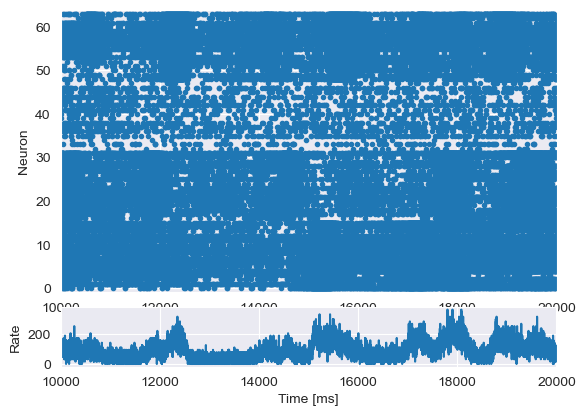

In [3]:
data = loadmat('/home/neurobook/Desktop/Research/MEA-data/data/n1-DIV17-01.mat')
ids = data['Channels'][0]
times = data['Times'][0]

spk_times = [(i, times[idx]*1000) for idx, i in enumerate(ids)]
spk_ids = np.unique(ids)

sl_n1 = SpikeList(spk_times, spk_ids)
sl_n1_small = sl_n1.time_slice(10000., 20000.)
sl_n1_small.raster_plot(with_rate=True)

In [6]:
sl_single = sl_n1.id_slice(list(np.arange(0, 16, 1)))

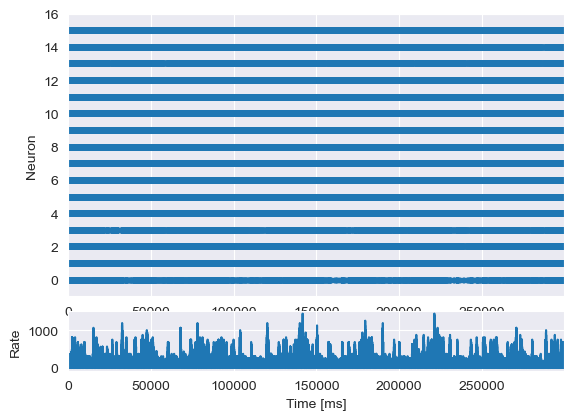

In [7]:
sl_single.raster_plot(with_rate=True)


Compiling activity matrix from SpikeList


100%|██████████| 16/16 [09:35<00:00, 35.94s/it]


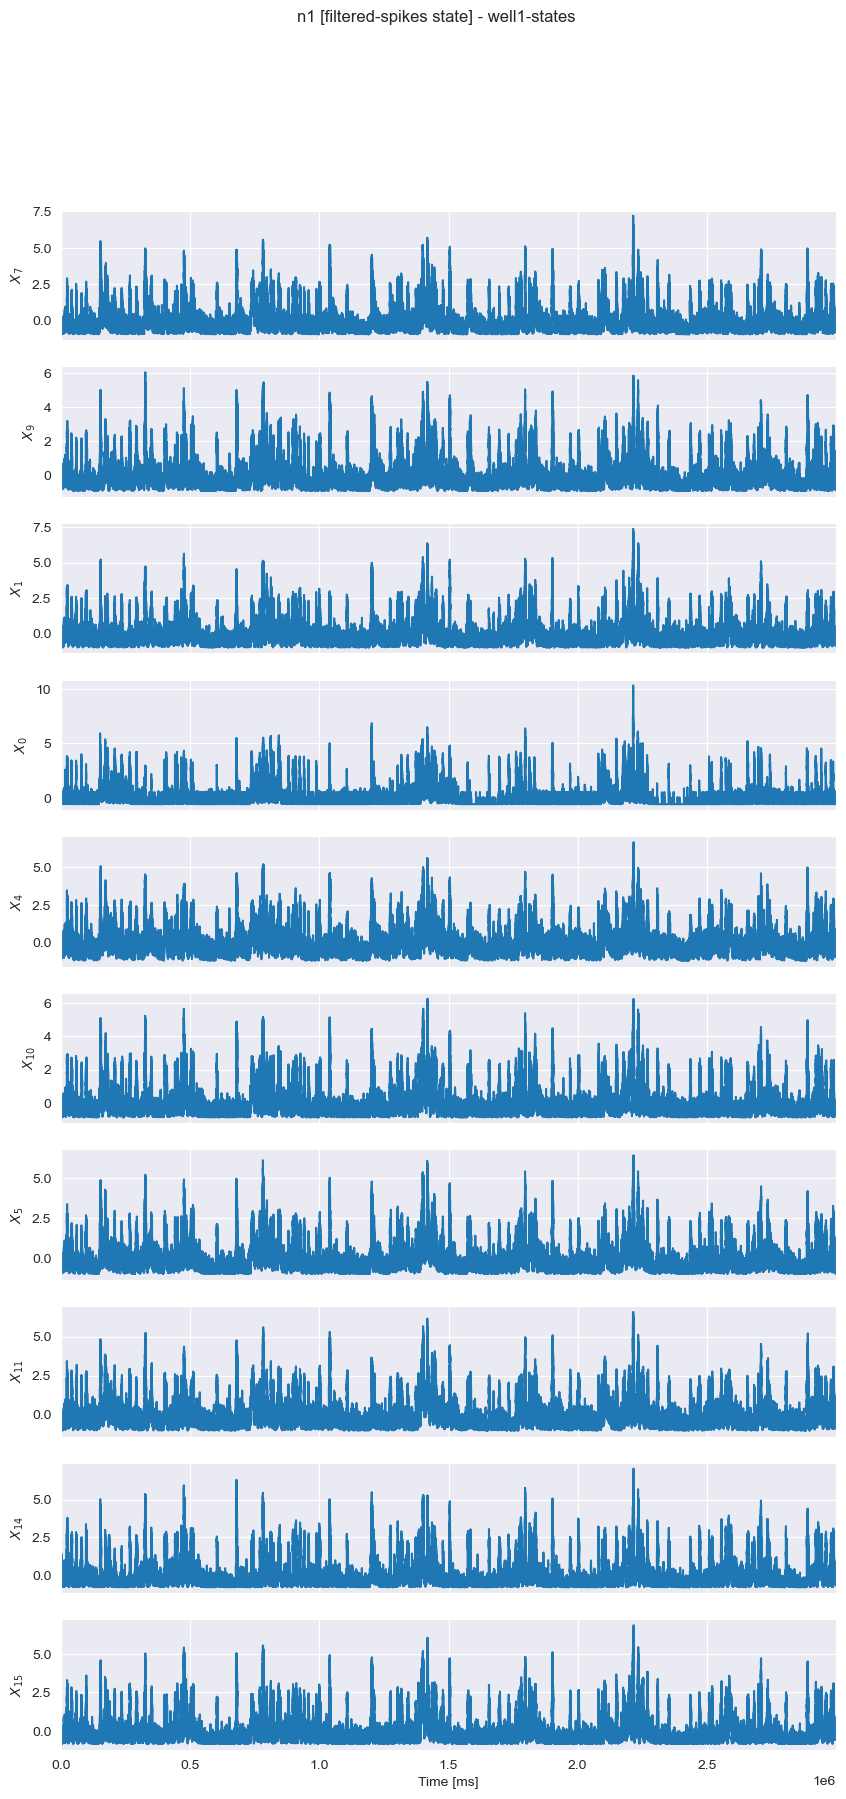

In [8]:
states = sl_single.filter_spiketrains(dt=0.1, tau=20.)
sl_single = StateMatrix(states, label="well1-states", state_var="filtered-spikes", population="n1", standardize=True)
sl_single.plot_sample_traces(save='./plots/sample_traces_singlewell.png')

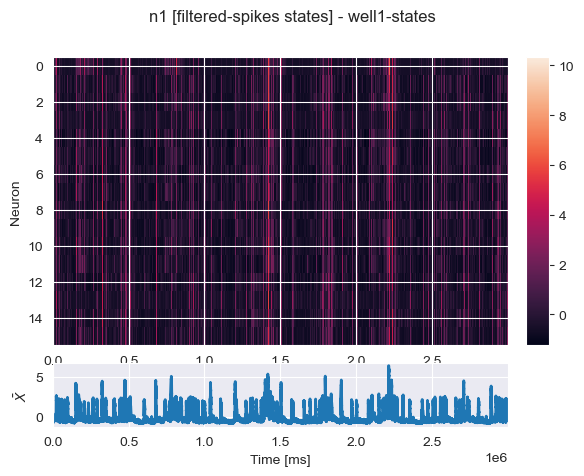

In [9]:
sl_single.plot_matrix(save='./plots/sample-states-well.png')

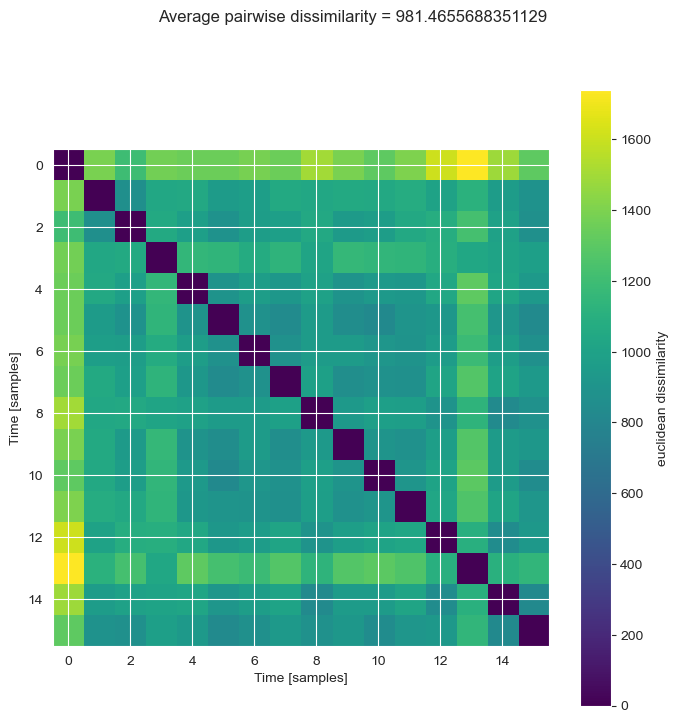

array([[   0.        , 1393.76355028, 1198.78002868, 1370.78989838,
        1347.58600222, 1351.58945803, 1387.02019428, 1353.26677518,
        1496.31112217, 1393.70390174, 1311.95597908, 1402.43092825,
        1610.78010687, 1741.03761571, 1488.77332016, 1306.00616711],
       [1393.76355028,    0.        ,  867.43425003, 1044.60626637,
        1053.09707782,  956.02463186,  976.98249542, 1056.89274913,
        1042.35279757, 1056.94542446, 1048.86953066, 1080.73211999,
        1005.56274662, 1110.01487177,  964.53471069,  888.31880637],
       [1198.78002868,  867.43425003,    0.        , 1055.34659741,
         983.6355953 ,  888.92020689,  971.42073811,  979.76221323,
        1052.8248857 ,  945.84301552,  967.87330842, 1049.22184835,
        1086.05436605, 1225.08988699,  996.94845551,  874.32043968],
       [1370.78989838, 1044.60626637, 1055.34659741,    0.        ,
        1155.36432721, 1137.5237789 , 1072.05656875, 1129.97879339,
        1016.54465486, 1156.30263845, 1144.88

In [10]:
from auxiliary import pairwise_distances

pairwise_distances(sl_single.matrix, metric='euclidean', plot=True, display=True, save='./plots/Euc_dist_n1.png')

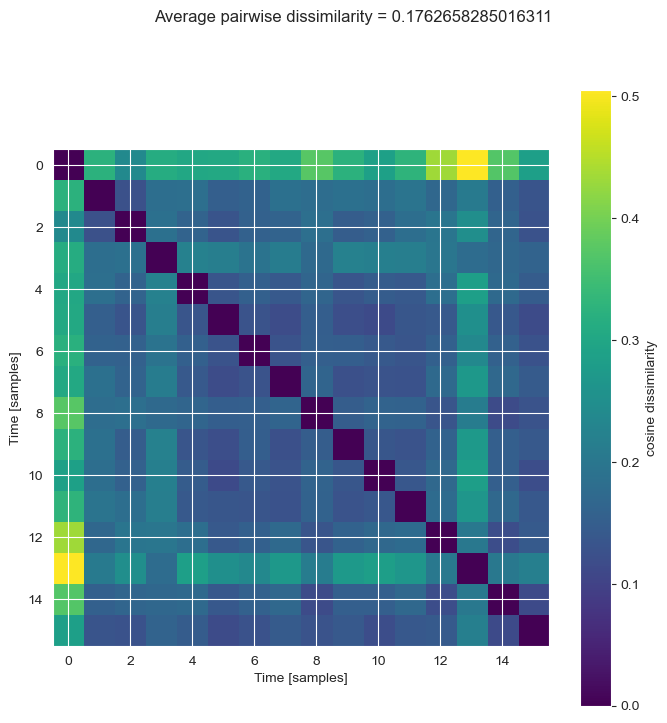

array([[0.        , 0.32376518, 0.23951402, 0.31317979, 0.30266689,
        0.30446791, 0.32063985, 0.30522407, 0.37316057, 0.32373747,
        0.28687352, 0.32780449, 0.4324386 , 0.5052057 , 0.36941038,
        0.28427744],
       [0.32376518, 0.        , 0.12540795, 0.18186838, 0.18483693,
        0.15233163, 0.15908363, 0.18617175, 0.18108455, 0.1861903 ,
        0.18335589, 0.19466508, 0.16852731, 0.20535701, 0.15505567,
        0.13151935],
       [0.23951402, 0.12540795, 0.        , 0.18562743, 0.16125768,
        0.13169749, 0.15727753, 0.15999017, 0.18474139, 0.14910426,
        0.15613094, 0.18347909, 0.19658712, 0.25014271, 0.16565225,
        0.12740697],
       [0.31317979, 0.18186838, 0.18562743, 0.        , 0.22247942,
        0.21566164, 0.19155229, 0.21281024, 0.17222844, 0.22284093,
        0.21846189, 0.21545215, 0.19839015, 0.17920827, 0.1690242 ,
        0.16042755],
       [0.30266689, 0.18483693, 0.16125768, 0.22247942, 0.        ,
        0.13266772, 0.15569394, 

In [11]:
pairwise_distances(sl_single.matrix, metric='cosine', plot=True, display=True, save='./plots/cosine_dist_n1.png')

[states.py:322 - INFO] Explained Variance (first 3 components): [0.82587519 0.03834771 0.02566714]
[states.py:44 - INFO] Determining effective dimensionality...
[states.py:57 - INFO] Effective dimensionality = 1.46
[states.py:58 - INFO] Elapsed Time: 0.0 s


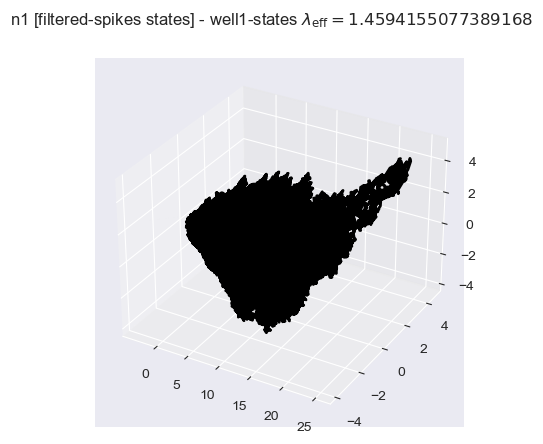

In [12]:
sl_single.plot_trajectory(save='./plots/single_well_trajectory.png')

[states.py:164 - INFO] Determining effective dimensionality of states well1-states
[states.py:177 - INFO] - Effective dimensionality = 1.46
[states.py:178 - INFO] - Elapsed Time: 2.54 s


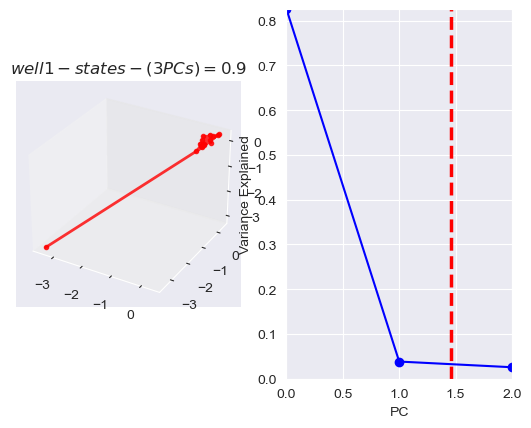

1.4594155077389168

In [13]:
sl_single.effective_dimensionality()

In [ ]:
sl_single.state_density(save='./plots/state_density-well.png')

In [ ]:
import sys, os, time
import numpy as np
import scipy.io as io
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_distances, euclidean_distances
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, SpectralEmbedding, TSNE
from sklearn.model_selection import KFold
import sklearn.metrics.pairwise as mtr
import umap

import NMLfunc as nml

import warnings
warnings.filterwarnings("ignore")

In [ ]:
down = 10 # downsampling factor for speeding up calculations (and memory constraints)
X = sl_single.matrix[:,::down].T
D = cosine_distances(X)
D.mean()

In [ ]:
D = euclidean_distances(X)
D.mean()

In [ ]:
# reconstruction parameters
K_lle = 10
LAMBDA = 1

# global parameters
DIMS = 5
AXIS_LIM = 1

# Load data
ds_plt = 1 # downsample for plotting
down = 3 # downsampling param for manifold embedding

# initialise dicts to store decoding scores
DIM = {}
RMSE = {}; R = {}
rec_corr = {}
var_svd = {}; H = {}

In [ ]:
### Fit embedding
pca = PCA(n_components=DIMS)
x_embd = pca.fit_transform(X)
x_embd = x_embd / np.max(np.abs(x_embd)) # normalise the values
AXIS_LIM = np.max(x_embd)

time_axis = np.arange(x_embd.shape[0], dtype=int)

In [ ]:
### Plot embedding
plt.set_cmap('hsv') # circular cmap
MIN = -AXIS_LIM
fig = plt.figure(figsize=(12,12))
grid = fig.add_gridspec(ncols=3, nrows=3)
plt.suptitle('PCA')
# 3D projection
ax = fig.add_subplot(grid[1:,:], projection='3d')
cmap = time_axis#[::down][::ds_plt]
scat = ax.scatter(x_embd[:,0][::ds_plt], x_embd[:,1][::ds_plt], x_embd[:,2][::ds_plt], c=cmap, alpha=.7)
# cbar = plt.colorbar(scat)
# cbar.set_label('Angular position')
# ax.set_xlabel('Comp 1'); ax.set_ylabel('Comp 2'); ax.set_zlabel('Comp 3')
ax.set_xlim([MIN,AXIS_LIM])
ax.set_ylim([MIN,AXIS_LIM])
ax.set_zlim([MIN,AXIS_LIM])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Comp1 vs Comp2
ax = fig.add_subplot(grid[0,0])
plt.scatter(x_embd[:,0][::ds_plt], x_embd[:,1][::ds_plt], c=cmap, alpha=.7)
ax.set_xlabel('Comp 1'); plt.ylabel('Comp 2')
ax.set_xticks([]); ax.set_yticks([])
ax.set_xlim([-AXIS_LIM-.1,AXIS_LIM+.1]); ax.set_ylim([-AXIS_LIM-.1,AXIS_LIM+.1])
sns.despine()
# Comp2 vs Comp3
ax = fig.add_subplot(grid[0,1])
plt.scatter(x_embd[:,1][::ds_plt], x_embd[:,2][::ds_plt], c=cmap, alpha=.7)
ax.set_xlabel('Comp 2'); plt.ylabel('Comp 3')
ax.set_xticks([]); ax.set_yticks([])
ax.set_xlim([-AXIS_LIM-.1,AXIS_LIM+.1]); ax.set_ylim([-AXIS_LIM-.1,AXIS_LIM+.1])
sns.despine()
# Comp1 vs Comp3
ax = fig.add_subplot(grid[0,2])
plt.scatter(x_embd[:,0][::ds_plt], x_embd[:,2][::ds_plt], c=cmap, alpha=.7)
ax.set_xlabel('Comp 1'); plt.ylabel('Comp 3')
ax.set_xticks([]); ax.set_yticks([])
ax.set_xlim([-AXIS_LIM-.1,AXIS_LIM+.1]); ax.set_ylim([-AXIS_LIM-.1,AXIS_LIM+.1])
sns.despine()

In [ ]:
### Intrinsic dimensionality
EMBD = 'PCA'
nstep = 30
Nneigh, radii, p = nml.intrinsic_dimensionality(x_embd, nstep=nstep, metric='euclidean',
                                            fit='std', thr_start=100, thr_fi=5e3)
DIM[EMBD] = p[0]

In [ ]:
### OLE  decoding
EMBD = 'PCA'
N = DIMS
cv = 10 # no cv folds
Y = time_axis #phi[::down].flatten() # angular position
RMSE[EMBD] = np.zeros((N,cv)); R[EMBD] = np.zeros((N,cv))
for n in range(N): # loop over dimensions
    X_ = x_embd[:,:n+1] # first n dimension of mds embedding
    kf = KFold(n_splits=cv)
    c = 0
    for train_index, test_index in kf.split(X_): # number of cv folds
        # 80% train - 20%  test
        X_train, X_test = X_[train_index], X_[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        f = nml.OLE(X_train, y_train) # f is weight  vector for the dimensions/neurons
        y_pred,rmse,r = nml.LinRec(f,X_test,y_test)
        RMSE[EMBD][n,c] = rmse; R[EMBD][n,c] = r
        c+=1

In [ ]:
### Reconstruction error
# scale Y to match X
Y = x_embd
radY = np.percentile(Y-np.mean(Y), 95)
radX = np.percentile(X-np.mean(X), 95)
Y_sc = radX/radY * (Y-np.mean(Y))
# 10-fold activity reconstruction
cv = 10
rec_corr[EMBD] = np.zeros((DIMS,cv))
for dim in range(DIMS):
    # obtain original high-dim activity and its embedding
    Y = Y_sc[::2,:dim+1]
    X_ = X[::2].copy()
    kf = KFold(n_splits=cv)
    c = 0
    for train_idx, test_idx in kf.split(X_): # number of cv folds
        # lle reconstruction
        X_rec = nml.new_LLE_pts(Y[train_idx,:].T, X_[train_idx,:].T, K_lle, Y[test_idx,:].T, LAMBDA)
#         s0 = np.mean((Y[test_idx].sum(1) - X_[test_idx].sum(1))**2)
#         s1 = np.mean((X_[test_idx] - X_rec)**2)
#         s2 = np.mean((X_[test_idx] - np.mean(X_[test_idx]))**2)
#         var_expl_embd[EMBD][dim,c] = 1 - s0/s2
#         var_expl[EMBD][dim,c] = 1 - s1/s2
#         rec_err[EMBD][dim,c] = np.mean(np.sqrt((X_[test_idx]-X_rec)**2))
        real = X_[test_idx].flatten()
        dec = X_rec.flatten()
        rec_corr[EMBD][dim,c] = np.corrcoef(real, dec)[0,1]
        c+=1
    print('.')

In [ ]:
plt.figure(figsize=(9,4));
plt.subplot(121)
plt.imshow(X_[:500],cmap='viridis'); plt.colorbar()
plt.title('Real data')
plt.subplot(122)
plt.imshow(X_rec[:500],cmap='viridis'); plt.colorbar()
plt.title('Reconstructed')

In [ ]:
### Fit embedding
x_embd,eig_mds_dff = nml.cmdscale(D)
x_embd = x_embd / np.max(x_embd)

In [ ]:
### Plot embedding
plt.set_cmap('hsv')  # circular cmap
MIN = -AXIS_LIM
fig = plt.figure(figsize=(12, 12))
grid = fig.add_gridspec(ncols=3, nrows=3)
plt.suptitle('MDS')
# 3D projection
ax = fig.add_subplot(grid[1:, :], projection='3d')
cmap = time_axis  # phi[::down][::ds_plt]
scat = ax.scatter(x_embd[:, 0][::ds_plt], x_embd[:, 1][::ds_plt], x_embd[:, 2][::ds_plt], c=cmap, alpha=.7)
# cbar = plt.colorbar(scat)
# cbar.set_label('Angular position')
# ax.set_xlabel('Comp 1'); ax.set_ylabel('Comp 2'); ax.set_zlabel('Comp 3')
ax.set_xlim([MIN, AXIS_LIM])
ax.set_ylim([MIN, AXIS_LIM])
ax.set_zlim([MIN, AXIS_LIM])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

In [ ]:
# Comp1 vs Comp2
ax = fig.add_subplot(grid[0, 0])
plt.scatter(x_embd[:, 0][::ds_plt], x_embd[:, 1][::ds_plt], c=cmap, alpha=.7)
ax.set_xlabel('Comp 1');
plt.ylabel('Comp 2')
ax.set_xticks([]);
ax.set_yticks([])
ax.set_xlim([-AXIS_LIM - .1, AXIS_LIM + .1]);
ax.set_ylim([-AXIS_LIM - .1, AXIS_LIM + .1])
sns.despine()
# Comp2 vs Comp3
ax = fig.add_subplot(grid[0, 1])
plt.scatter(x_embd[:, 1][::ds_plt], x_embd[:, 2][::ds_plt], c=cmap, alpha=.7)
ax.set_xlabel('Comp 2');
plt.ylabel('Comp 3')
ax.set_xticks([]);
ax.set_yticks([])
ax.set_xlim([-AXIS_LIM - .1, AXIS_LIM + .1]);
ax.set_ylim([-AXIS_LIM - .1, AXIS_LIM + .1])
sns.despine()
# Comp1 vs Comp3
ax = fig.add_subplot(grid[0, 2])
plt.scatter(x_embd[:, 0][::ds_plt], x_embd[:, 2][::ds_plt], c=cmap, alpha=.7)
ax.set_xlabel('Comp 1');
plt.ylabel('Comp 3')
ax.set_xticks([]);
ax.set_yticks([])
ax.set_xlim([-AXIS_LIM - .1, AXIS_LIM + .1]);
ax.set_ylim([-AXIS_LIM - .1, AXIS_LIM + .1])
sns.despine()

In [ ]:
evals_mds_ = eig_mds_dff[eig_mds_dff > 0] / np.sum(eig_mds_dff[eig_mds_dff > 0])
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(evals_mds_)[:50])
plt.ylabel('Variance explained')
plt.xlabel('Number of dimensions')
### Dimensionality
EMBD = 'MDS'
nstep = 30
Nneigh, radii, p = nml.intrinsic_dimensionality(x_embd[:, :DIMS], nstep=nstep, metric='euclidean',
                                                fit='std', thr_start=100, thr_fi=5e3)
DIM[EMBD] = p[0]
### OLE  decoding
EMBD = 'MDS'
N = DIMS
cv = 10
Y = time_axis  # phi[::down].flatten() # angulat position
RMSE[EMBD] = np.zeros((N, cv));
R[EMBD] = np.zeros((N, cv))
for n in range(N):  # loop over dimensions
    X_ = x_embd[:, :n + 1]  # first n dimension of mds embedding
    kf = KFold(n_splits=cv)
    c = 0
    for train_index, test_index in kf.split(X_):  # number of cv folds
        # 80% train - 20%  test
        X_train, X_test = X_[train_index], X_[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        f = nml.OLE(X_train, y_train)  # f is weight  vector for the dimensions/neurons
        y_pred, rmse, r = nml.LinRec(f, X_test, y_test)
        RMSE[EMBD][n, c] = rmse;
        R[EMBD][n, c] = r
        c += 1
### Reconstruction error
# scale Y to match X
Y = x_embd
radY = np.percentile(Y - np.mean(Y), 95)
radX = np.percentile(X - np.mean(X), 95)
Y_sc = radX / radY * (Y - np.mean(Y))
# 10-fold activity reconstruction
cv = 10
rec_corr[EMBD] = np.zeros((DIMS, cv))
for dim in range(DIMS):
    # obtain og high-dim activity and its embedding

    Y = Y_sc[:, :dim + 1]
    X_ = X.copy()
    kf = KFold(n_splits=cv)
    c = 0
    for train_idx, test_idx in kf.split(X_):  # number of cv folds
        # lle reconstruction
        X_rec = nml.new_LLE_pts(Y[train_idx, :].T, X_[train_idx, :].T, K_lle,
                                Y[test_idx, :].T, LAMBDA)
        real = X_[test_idx].flatten()
        dec = X_rec.flatten()
        rec_corr[EMBD][dim, c] = np.corrcoef(real, dec)[0, 1]
        c += 1
    print('.')
# Visualise a reconstruction example
plt.figure(figsize=(9, 8));
plt.subplot(121);
plt.imshow(X_[:400], cmap='viridis');
plt.colorbar()
plt.title('Real data')
plt.subplot(122)
plt.imshow(X_rec[:400], cmap='viridis');
plt.colorbar()
plt.title('Reconstructed');
rec_corr['MDS'].mean()